In [2]:
import talib as ta 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
import itertools
from sklearn import metrics
plt.style.use ('seaborn')

In [3]:
def plot_conf_mat(cm, classes, title, cmap = plt.cm.Blues):                                 
    #Plot confusion matrix to see True Positives, False Positives, True Negatives and False Negatives 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    #why cm.max()  /2??
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

In [4]:
def model_evaluation(y_pred, y_test):
    c_mat = confusion_matrix(y_test, y_pred, normalize = 'all') ## Predicted vs. actual outcome
    auc = round(roc_auc_score(y_test, y_pred),4)
    accuracy = round(accuracy_score(y_test,y_pred) ,4)
    recall = round(recall_score(y_test, y_pred),4)
    precision = round(precision_score(y_test, y_pred),4)
    class_names = ['Positive', 'Negative'] ## Different class names
    plt.figure()
    fig, ax = plt.subplots(figsize=(6,4))
    plot_conf_mat(c_mat,classes=class_names,title="Confusion Matrix")
    plt.show()
    print(f"Accuracy: {accuracy}")
    print(f"Area under the curve (AUC): {auc}")
    print(f"Recall Score: {recall}")
    auc = round(roc_auc_score(y_test, y_pred), 4)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',
    label='AUC = %0.2f'% auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



In [5]:
tic = ['BTC-USD']

In [6]:
df = yf.download(tickers= tic, start= '2015-01-01', end= '2016-01-01', interval='1d') 

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [8]:
df['EMA_10'] = ta.EMA(df['Close'].values, timeperiod=10)
df['EMA_30'] = ta.EMA(df['Close'].values, timeperiod=30)

In [9]:
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, 
                   df['Close'].values, timeperiod=14)

In [10]:
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, 
                   df['Close'].values, timeperiod=14)

In [11]:
df['RSI'] = ta.RSI(df['Close'].values, timeperiod=14)

In [12]:
macd, macdsignal, macdhist = ta.MACD( df['Close'].values, 
                                     fastperiod=12, slowperiod=26, signalperiod=9)

In [13]:
df['MACD'] = macd
df['MACDsignal'] = macdsignal

In [14]:
df.head(17)

,Open,High,Low,Close,Adj Close,Volume,EMA_10,EMA_30,ATR,ADX,RSI,MACD,MACDsignal
Date,,,,,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,282.382996,291.114014,280.532990,290.407990,290.407990,18718600,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#creating predictors 
df['Close_EMA_10'] = np.where(df['Close']> df['EMA_10'], 1, -1)
df['EMA_10>EMA_30'] = np.where(df['EMA_10'] > df['EMA_30'], 1, -1)
df['MACD_Signal_MACD'] = np.where(df['MACDsignal'] > df['MACD'], 1, -1)

In [16]:
#predicting directiion with positive and negative returns (pos:1, neg:-1)
df['returns'] = np.log(df['Close']/df['Close'].shift(1))
df['target'] = np.where(df['returns'] > 0, 1, 0)

In [17]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,EMA_10,EMA_30,ATR,ADX,RSI,MACD,MACDsignal,Close_EMA_10,EMA_10>EMA_30,MACD_Signal_MACD,returns,target
Date,,,,,,,,,,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,NaN,0
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.002489,1
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-0.114028,0
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-0.061959,0
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.038169,1
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.041796,1
2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.028073,1
2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-0.038046,0
2015-01-09,282.382996,291.114014,280.532990,290.407990,290.407990,18718600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.024607,1


In [18]:
df.dropna(inplace= True)
index = df.index
len(index)

333

In [19]:
X = df[['Close_EMA_10', 'EMA_10>EMA_30', 
        'MACD_Signal_MACD']]
y = df.target

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state=1, stratify= y)

Text(0.5, 1.0, 'RSI')

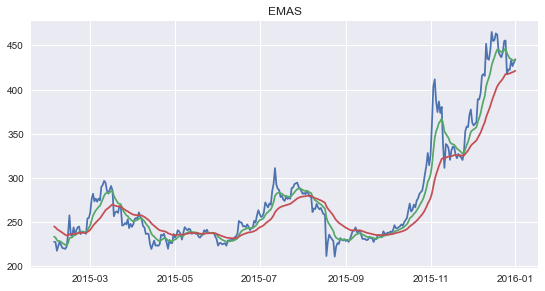

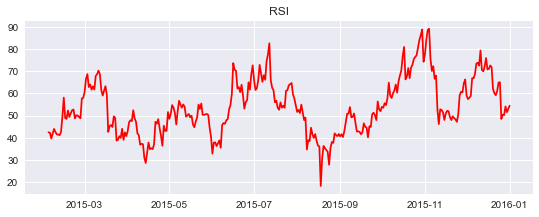

In [22]:
emas = df[['Close', 'EMA_10', 'EMA_30']]
atr = df['ATR']
adx = df['ADX']
macd = df['MACD']
rsi = df['RSI']


plt.subplot(2,2,1)
plt.plot(emas)
plt.title('EMAS')

plt.figure(figsize=(20,7))
plt.subplot(2,2,2)
plt.plot(rsi, 'r-')
plt.title('RSI')

In [132]:
y_train

Date
2015-12-20    0
2015-04-04    0
2015-02-03    0
2015-04-30    1
2015-10-20    1
             ..
2015-11-25    1
2015-08-29    0
2015-10-03    1
2015-11-22    0
2015-03-07    1
Name: target, Length: 233, dtype: int32

In [133]:
def model_selection_1(X,Y):
    seed = 7
    models = []
    models.append(('LogisticRegression', 
                   LogisticRegression(random_state=seed)))
    models.append(('LinearDiscriminantAnalysis', 
                   LinearDiscriminantAnalysis()))
    models.append(('KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('RandomForestClassifier', RandomForestClassifier()))
    models.append(('ExtraTreesClassifier',
                   ExtraTreesClassifier(random_state=seed)))
    models.append(('AdaBoostClassifier',
                   AdaBoostClassifier(DecisionTreeClassifier(random_state=seed),random_state=seed,learning_rate=0.1)))
    models.append(('SVM',svm.SVC(random_state=seed)))
    models.append(('GradientBoostingClassifier',
                   GradientBoostingClassifier(random_state=seed)))
    #models.append(('MLPClassifier',MLPClassifier(random_state=seed)))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
        print(msg) 
        results, names

In [134]:
results = model_selection_1(X, y)

LogisticRegression: 0.660250 (0.090438)
LinearDiscriminantAnalysis: 0.660250 (0.090438)
KNeighborsClassifier: 0.612567 (0.084910)
DecisionTreeClassifier: 0.660250 (0.090438)
GaussianNB: 0.660250 (0.090438)
RandomForestClassifier: 0.660250 (0.090438)
ExtraTreesClassifier: 0.660250 (0.090438)
AdaBoostClassifier: 0.660250 (0.090438)
SVM: 0.660250 (0.090438)
GradientBoostingClassifier: 0.660250 (0.090438)


In [135]:
lr = LogisticRegression()

In [136]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [137]:
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
c_values = [200,500,1000,100, 10, 1.0, 0.1, 0.01]
# define grid search

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)
print(param_grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l2'], 'C': [200, 500, 1000, 100, 10, 1.0, 0.1, 0.01]}


In [138]:
def grid_ser(param_grid, model, X_train, y_train):

  
  
      grid = GridSearchCV(model,param_grid, cv=5, verbose = 2, n_jobs = -1)
  
      grid.fit(X_train, y_train)
  
      result = {"best_params": grid.best_params_, 'best_estimator': grid.best_estimator_, 
            'best_score':grid.best_score_ }
  
      return result

In [139]:
grid_ser(param_grid=param_grid, model= lr, X_train=X_train, y_train=y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'best_params': {'C': 200, 'penalty': 'l2', 'solver': 'newton-cg'},
 'best_estimator': LogisticRegression(C=200, solver='newton-cg'),
 'best_score': 0.6519888991674376}

In [140]:
lr_op = LogisticRegression(C= 0.1, solver='newton-cg')

In [141]:
lr_op.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [142]:
y_pred_lr_op = lr_op.predict(X_test)
print(y_pred_lr_op)
print(y_test.values)

[0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1]
[0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1]


<Figure size 432x288 with 0 Axes>

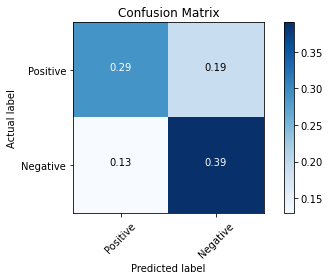

Accuracy: 0.68
Area under the curve (AUC): 0.6771
Recall Score: 0.75


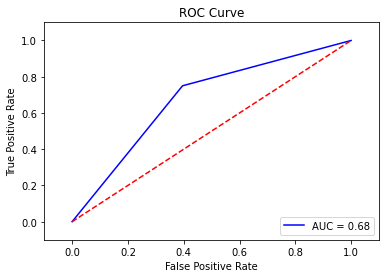

In [143]:
model_evaluation(y_pred_lr_op, y_test)

In [144]:
report = classification_report(y_test, y_pred_lr_op)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        48
           1       0.67      0.75      0.71        52

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



In [145]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA_10,EMA_30,ATR,ADX,RSI,MACD,MACDsignal,Close_EMA_10,EMA_10>EMA_30,MACD_Signal_MACD,returns,target
Date,,,,,,,,,,,,,,,,,,
2015-02-03,237.453995,245.957001,224.483002,227.268005,227.268005,40783700,233.141080,244.671491,21.423485,30.830207,42.402153,-12.540186,-16.966785,-1,-1,-1,-0.047102,0
2015-02-04,227.511002,230.057999,221.113007,226.852997,226.852997,26594300,231.997792,243.521910,20.532164,28.825730,42.288943,-11.869376,-15.947303,-1,-1,-1,-0.001828,0
2015-02-05,227.664993,239.404999,214.725006,217.110992,217.110992,22516400,229.291101,241.817980,20.828437,27.061875,39.615108,-11.985689,-15.154980,-1,-1,-1,-0.043894,0
2015-02-06,216.923004,230.509995,216.231995,222.266006,222.266006,24435300,228.013811,240.556563,20.360549,25.424009,41.715157,-11.529002,-14.429785,-1,-1,-1,0.023466,1
2015-02-07,222.632996,230.298996,222.606995,227.753998,227.753998,21604200,227.966573,239.730591,19.480009,23.903134,43.949991,-10.602026,-13.664233,-1,-1,-1,0.024391,1


In [146]:
def model_selection_2(X_train,y_train):
        seed = 5
        models = []
        
        models.append(('LR', LogisticRegression()))
        models.append(('LDA', LinearDiscriminantAnalysis()))
        models.append(('KNN', KNeighborsClassifier()))
        models.append(('CART', DecisionTreeClassifier()))
        models.append(('NB', GaussianNB()))
        models.append(('SVM', svm.SVC()))
        models.append(('RFT', RandomForestClassifier()))

    
        results = []
        names = []
        scoring = 'accuracy'
    
        for name, model in models:
            kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
            cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
            print(msg) 
            results, names
            



In [147]:
model_selection_2(X_train, y_train)

LR: 0.661141 (0.078602)
LDA: 0.661141 (0.078602)
KNN: 0.558467 (0.111902)
CART: 0.661141 (0.078602)
NB: 0.661141 (0.078602)
SVM: 0.661141 (0.078602)
RFT: 0.661141 (0.078602)


In [148]:
def plot_models(results, names):
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()